# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_AnotherShadow_1.csv")
df.head()

,userName,score,at,content
0,Meyza Nuraini,5,2024-05-22 10:58:16,"Game nya seru banget, teka-tekinya susah tapi ..."
1,Eva Syareefa Mutmainnah,5,2024-05-22 10:45:07,Bagusss tapi sad ending ☹
2,Rini Juwita Sary,5,2024-05-15 07:49:49,Huhuhuu sereemm tapi seruu
3,Dotomos,5,2024-05-12 17:08:35,😍
4,Nursyifa Fadhila,5,2024-05-06 08:45:20,Di tunggu episode berikutnyaa 🥰


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Game nya seru banget, teka-tekinya susah tapi ...",Meyza Nuraini,2024-05-22 10:58:16
1,Bagusss tapi sad ending ☹,Eva Syareefa Mutmainnah,2024-05-22 10:45:07
2,Huhuhuu sereemm tapi seruu,Rini Juwita Sary,2024-05-15 07:49:49
3,😍,Dotomos,2024-05-12 17:08:35
4,Di tunggu episode berikutnyaa 🥰,Nursyifa Fadhila,2024-05-06 08:45:20
...,...,...,...
592,"Anjay keren, kisah ini kuberi nama ""Aku lebih ...",Ren Di,2023-03-07 04:47:39
593,"Game teka teki yang sangat kompleks, sangat ba...",Albertus Bagus Prasetya,2023-03-06 20:13:00
594,Mantap,RIYA GERALDY,2023-03-06 15:30:20
595,"udah mainin semua gamenya, keren"" huhuu😭😭 ditu...",Lidya Sintya Sari 19,2023-03-04 17:36:08


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,572,597,597
top,Bagus,Meyza Nuraini,2024-05-22 10:58:16
freq,5,1,1


# **Cleaning Data**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(572, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,game nya seru banget tekatekinya susah tapi it...,Meyza Nuraini,2024-05-22 10:58:16
1,bagusss tapi sad ending,Eva Syareefa Mutmainnah,2024-05-22 10:45:07
2,huhuhuu sereemm tapi seruu,Rini Juwita Sary,2024-05-15 07:49:49
3,,Dotomos,2024-05-12 17:08:35
4,di tunggu episode berikutnyaa,Nursyifa Fadhila,2024-05-06 08:45:20
...,...,...,...
591,dark dome ga pernah gagal kasi misteri di seti...,Risqi Nafiah,2023-03-09 13:34:04
592,anjay keren kisah ini kuberi nama aku lebih me...,Ren Di,2023-03-07 04:47:39
593,game teka teki yang sangat kompleks sangat bag...,Albertus Bagus Prasetya,2023-03-06 20:13:00
595,udah mainin semua gamenya keren huhuu ditunggu...,Lidya Sintya Sari 19,2023-03-04 17:36:08


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,game nya seru banget tekatekinya susah tapi it...,Meyza Nuraini,2024-05-22 10:58:16
1,bagusss tapi sad ending,Eva Syareefa Mutmainnah,2024-05-22 10:45:07
2,huhuhuu sereemm tapi seruu,Rini Juwita Sary,2024-05-15 07:49:49
3,,Dotomos,2024-05-12 17:08:35
4,di tunggu episode berikutnyaa,Nursyifa Fadhila,2024-05-06 08:45:20
...,...,...,...
591,dark dome ga pernah gagal kasi misteri di seti...,Risqi Nafiah,2023-03-09 13:34:04
592,anjay keren kisah ini kuberi nama aku lebih me...,Ren Di,2023-03-07 04:47:39
593,game teka teki yang sangat kompleks sangat bag...,Albertus Bagus Prasetya,2023-03-06 20:13:00
595,udah mainin semua gamenya keren huhuu ditunggu...,Lidya Sintya Sari 19,2023-03-04 17:36:08


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,game nya seru banget tekatekinya susah itu bua...,Meyza Nuraini,2024-05-22 10:58:16
1,bagusss sad ending,Eva Syareefa Mutmainnah,2024-05-22 10:45:07
2,huhuhuu sereemm seruu,Rini Juwita Sary,2024-05-15 07:49:49
3,,Dotomos,2024-05-12 17:08:35
4,tunggu episode berikutnyaa,Nursyifa Fadhila,2024-05-06 08:45:20
...,...,...,...
591,dark dome ga pernah gagal kasi misteri setiap ...,Risqi Nafiah,2023-03-09 13:34:04
592,anjay keren kisah kuberi nama aku lebih memili...,Ren Di,2023-03-07 04:47:39
593,game teka teki sangat kompleks sangat bagus su...,Albertus Bagus Prasetya,2023-03-06 20:13:00
595,udah mainin semua gamenya keren huhuu ditunggu...,Lidya Sintya Sari 19,2023-03-04 17:36:08


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [game, nya, seru, banget, tekatekinya, susah, ...
1                                 [bagusss, sad, ending]
2                              [huhuhuu, sereemm, seruu]
3                                                     []
4                         [tunggu, episode, berikutnyaa]
                             ...                        
591    [dark, dome, ga, pernah, gagal, kasi, misteri,...
592    [anjay, keren, kisah, kuberi, nama, aku, lebih...
593    [game, teka, teki, sangat, kompleks, sangat, b...
595    [udah, mainin, semua, gamenya, keren, huhuu, d...
596    [the, ending, made, me, even, more, curiousbec...
Name: content, Length: 572, dtype: object

In [20]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AnotherShadow_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AnotherShadow_1.csv', encoding = 'latin1')
df_clean

,content
0,game nya seru banget tekatekinya susah itu bua...
1,bagusss sad ending
2,huhuhuu sereemm seruu
3,NaN
4,tunggu episode berikutnyaa
...,...
567,dark dome ga pernah gagal kasi misteri tiap ga...
568,anjay keren kisah beri nama aku lebih pilih ik...
569,game teka teki sangat kompleks sangat bagus su...
570,udah mainin semua gamenya keren huhuu tunggu l...


# **Translate**

In [22]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_AnotherShadow_1.csv', encoding='latin1')

In [25]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,game nya seru banget tekatekinya susah itu bua...
1,bagusss sad ending
2,huhuhuu sereemm seruu
3,huhuhuu sereemm seruu
4,tunggu episode berikutnyaa
...,...
567,dark dome ga pernah gagal kasi misteri tiap ga...
568,anjay keren kisah beri nama aku lebih pilih ik...
569,game teka teki sangat kompleks sangat bagus su...
570,udah mainin semua gamenya keren huhuu tunggu l...


In [28]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AnotherShadow_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AnotherShadow_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.
1,1,bagusss sad ending,nicess sad ending
2,2,huhuhuu sereemm seruu,huhuhuu sereemm ceruu
3,3,huhuhuu sereemm seruu,huhuhuu sereemm ceruu
4,4,tunggu episode berikutnyaa,Wait for the next episode.
...,...,...,...
567,567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...
568,568,anjay keren kisah beri nama aku lebih pilih ik...,"fontcolor="" # FFFF00""anjaycool fontcolor="" # F..."
569,569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...
570,570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor..."


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_AnotherShadow_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.
1,1,bagusss sad ending,nicess sad ending
2,2,huhuhuu sereemm seruu,huhuhuu sereemm ceruu
3,3,huhuhuu sereemm seruu,huhuhuu sereemm ceruu
4,4,tunggu episode berikutnyaa,Wait for the next episode.
...,...,...,...
567,567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...
568,568,anjay keren kisah beri nama aku lebih pilih ik...,"fontcolor="" # FFFF00""anjaycool fontcolor="" # F..."
569,569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...
570,570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor..."


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 326
Netral = 117
Negatif = 129

Total Data Seluruhnya : 572


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.,Negatif
1,1,bagusss sad ending,nicess sad ending,Negatif
2,2,huhuhuu sereemm seruu,huhuhuu sereemm ceruu,Netral
3,3,huhuhuu sereemm seruu,huhuhuu sereemm ceruu,Netral
4,4,tunggu episode berikutnyaa,Wait for the next episode.,Netral
...,...,...,...,...
567,567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...,Negatif
568,568,anjay keren kisah beri nama aku lebih pilih ik...,"fontcolor="" # FFFF00""anjaycool fontcolor="" # F...",Netral
569,569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...,Negatif
570,570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor...",Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.,Negatif
1,bagusss sad ending,nicess sad ending,Negatif
2,huhuhuu sereemm seruu,huhuhuu sereemm ceruu,Netral
3,huhuhuu sereemm seruu,huhuhuu sereemm ceruu,Netral
4,tunggu episode berikutnyaa,Wait for the next episode.,Netral
...,...,...,...
567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...,Negatif
568,anjay keren kisah beri nama aku lebih pilih ik...,"fontcolor="" # FFFF00""anjaycool fontcolor="" # F...",Netral
569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...,Negatif
570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor...",Positif


# **Visualisasi**


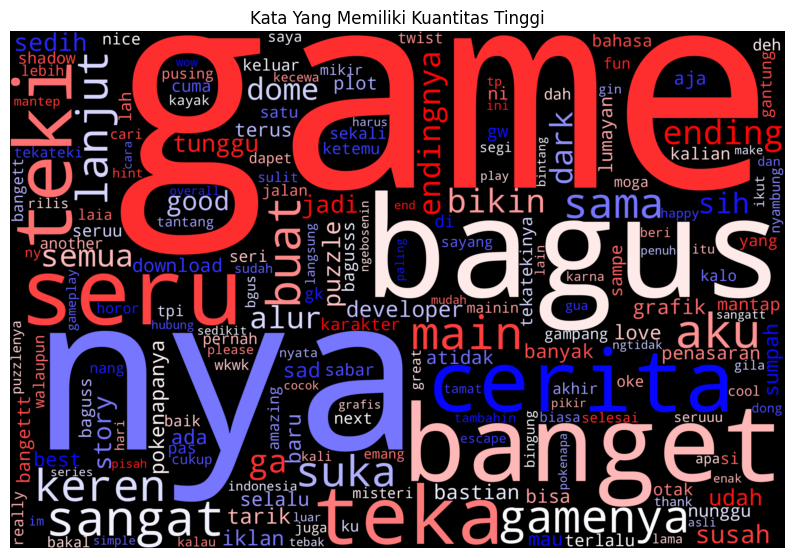

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


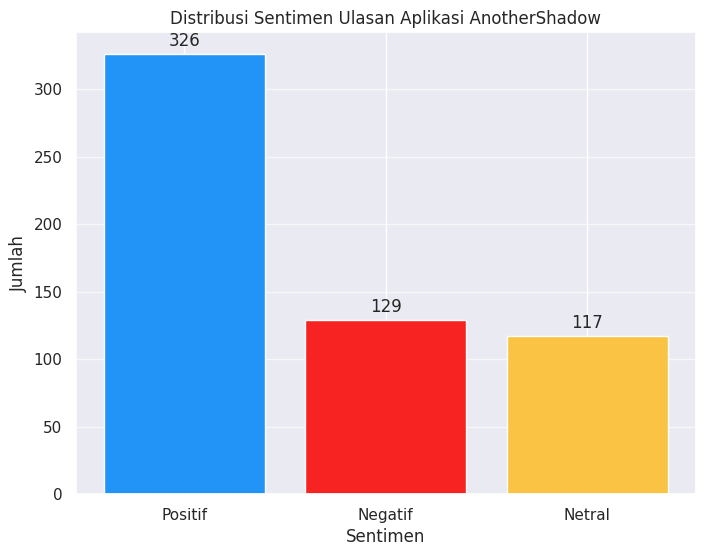

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AnotherShadow")


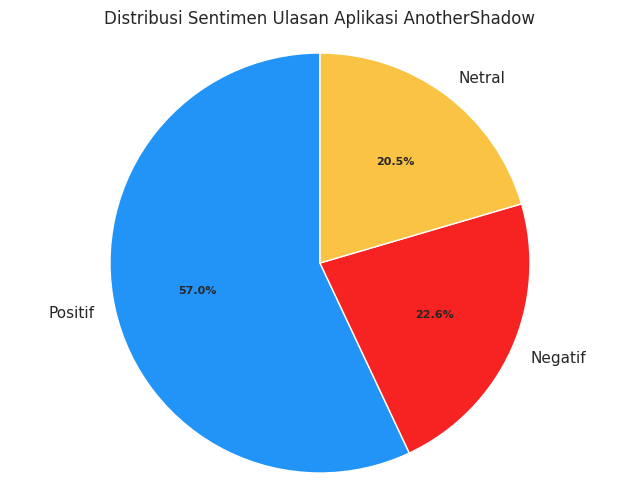

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AnotherShadow")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.,Negatif
1,bagusss sad ending,nicess sad ending,Negatif
5,aku nyelesain semua game dark dome gamenya bag...,I finished all the dark games. The game's cool...,Positif
7,game bagus saya ngtidak ngerti,Good game. I don't understand.,Positif
8,bgus sangat pls,bgus very pls,Positif
...,...,...,...
566,bagusssss bangett udah habisin semua game dark...,goodsssss pretty much finished all the darkdom...,Positif
567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...,Negatif
569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...,Negatif
570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor...",Positif


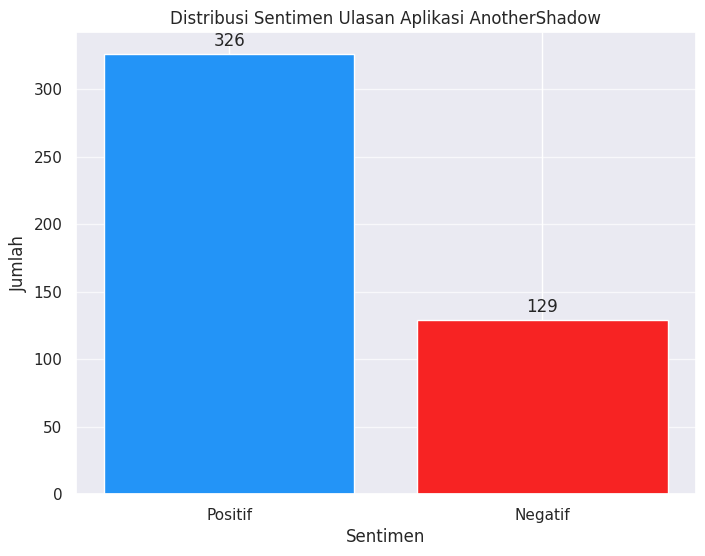

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AnotherShadow")


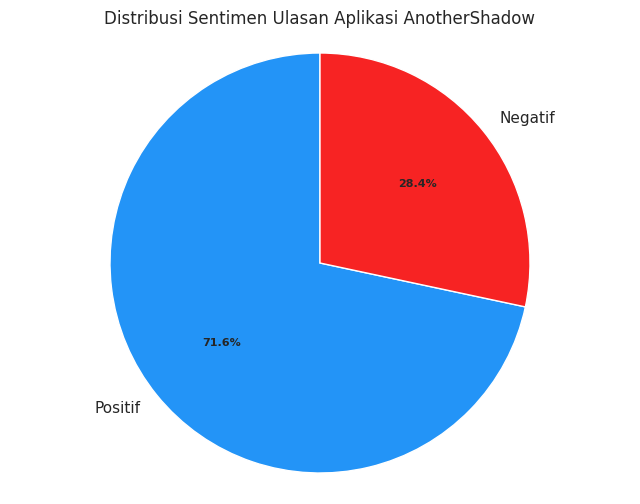

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi AnotherShadow")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,game nya seru banget tekatekinya susah itu bua...,The game is fun. The puzzle is hard. It's fun.,0
1,bagusss sad ending,nicess sad ending,0
5,aku nyelesain semua game dark dome gamenya bag...,I finished all the dark games. The game's cool...,1
7,game bagus saya ngtidak ngerti,Good game. I don't understand.,1
8,bgus sangat pls,bgus very pls,1
...,...,...,...
566,bagusssss bangett udah habisin semua game dark...,goodsssss pretty much finished all the darkdom...,1
567,dark dome ga pernah gagal kasi misteri tiap ga...,The dark dome never fails. Each game's mystery...,0
569,game teka teki sangat kompleks sangat bagus su...,It's a very complex puzzle game. Very good. I'...,0
570,udah mainin semua gamenya keren huhuu tunggu l...,"fontcolor="" # FFFF00""playallthegames fontcolor...",1


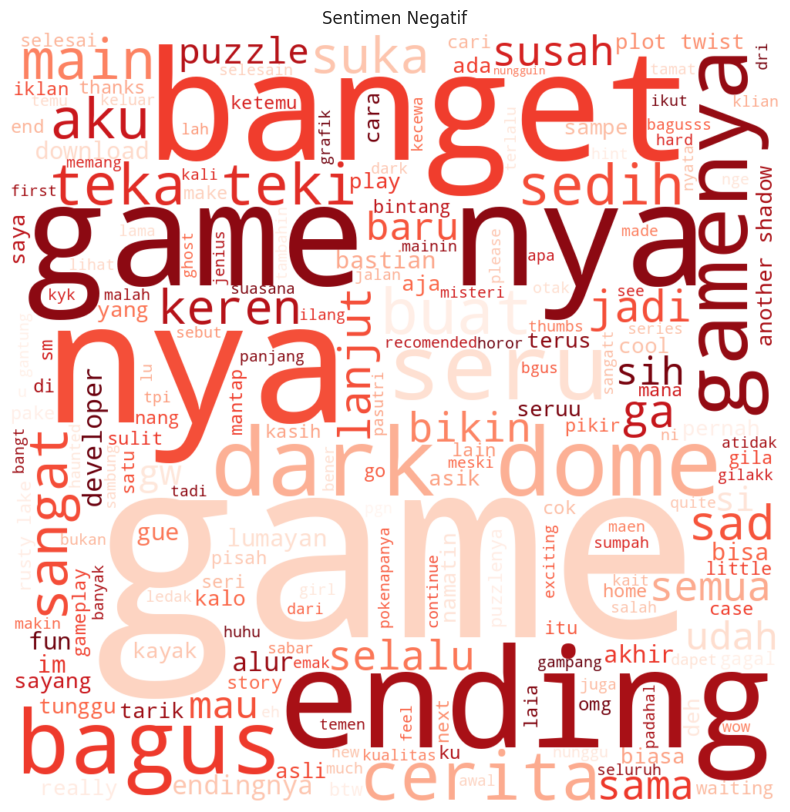

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

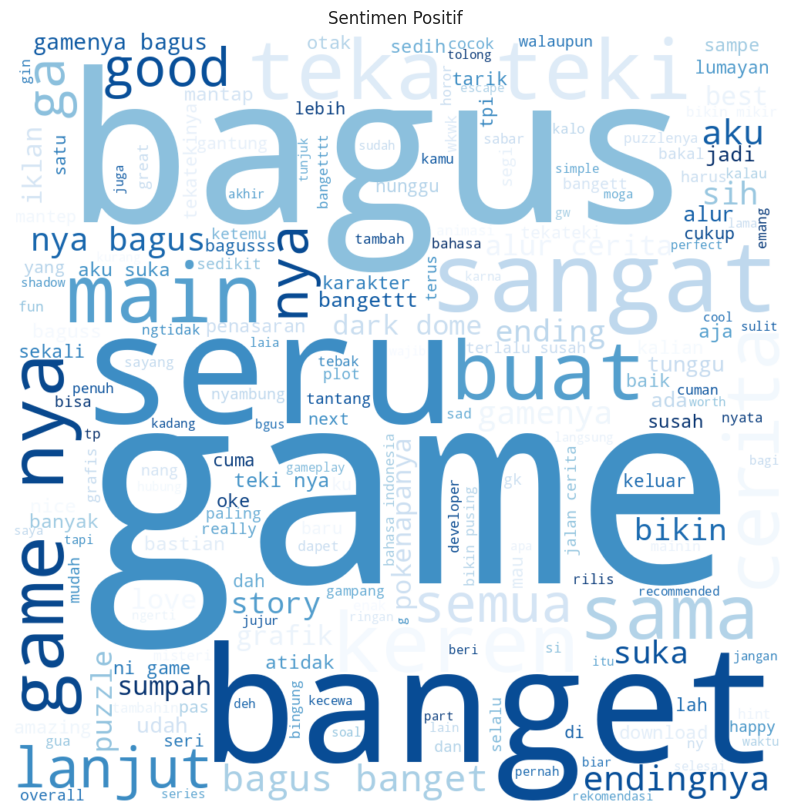

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    326
0    129
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
X_train

29                                                 bagus
22                         biasa game dark dome emng top
79     game nya bagus suka buat teka teki nya tolong ...
377                                    baguusss bangettt
314                                                great
                             ...                        
133    jujur ku udah main in semua seri game nya seja...
338                                  good game suka game
432    sukaaa banget sama story animasi teka teki har...
544    gamenya bagus segi cerita tekateki oke banget ...
128    seru gamenyaa bikin mikir wkwk walaupun pake b...
Name: content, Length: 364, dtype: object

In [49]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [50]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6923076923076923
Akurasi untuk c = 0.05: 0.6923076923076923
Akurasi untuk c = 0.25: 0.7362637362637363
Akurasi untuk c = 0.5: 0.7252747252747253
Akurasi untuk c = 0.75: 0.7032967032967034
Akurasi untuk c = 1: 0.6923076923076923


In [53]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [54]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.6923076923076923 


In [55]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.69
[[ 6 22]
 [ 6 57]]
              precision    recall  f1-score   support

           0       0.50      0.21      0.30        28
           1       0.72      0.90      0.80        63

    accuracy                           0.69        91
   macro avg       0.61      0.56      0.55        91
weighted avg       0.65      0.69      0.65        91



In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 6 22]
 [ 6 57]]

True Positives (TP) =  6

True Negatives (TN) =  57

False Positives (FP) =  22

False Negatives (FN) =  6

Accuracy =  0.6923076923076923


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

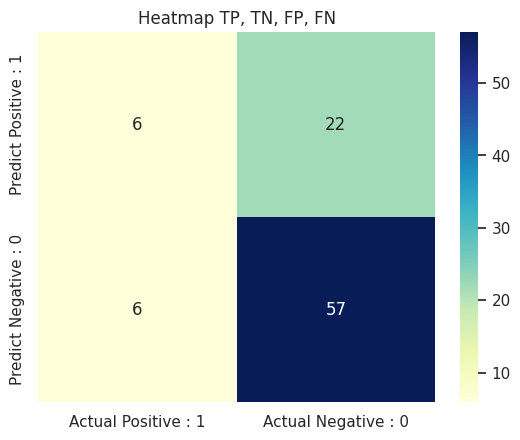

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [58]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6923


In [60]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3077


# **Testing**


In [67]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus bgt gamenya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 97.21%
Probabilitas: 97.20873055084527 %


In [68]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek bgt 
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 73.28%
Probabilitas: 73.28355609419282 %


In [70]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jalan cerita menarik dengan sedikit genre horror dan misteri
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 86.38%
Probabilitas: 86.38231913344669 %


In [71]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : gamenya kurang asik , alur cerita ngga jelas , overall jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 51.91%
Probabilitas: 51.90649706545067 %
